### 两端自由的简谐振子示意图

![har_osc_free](assets/harmonic_oscillator_free.png)


In [8]:
"""两端自由的简谐振子的velocity verlet算法实现"""
# reference code:
# https://github.com/antoineblosse/velocityVerlet/blob/master/velocityVerlet.py

import numpy as np


def thermo_data(
    x1: float,
    x2: float,
    v1: float,
    v2: float,
    k: float = 1.0,
    mass: float = 1.0,
    x_equil: float = 1.0,
    step: int = 0,
    dt: float = 0.05,
):
    """计算热力学信息"""

    x_distance = x2 - x1 - x_equil
    Ep = 0.5 * k * x_distance**2
    Ek1 = 0.5 * mass * v1**2
    Ek2 = 0.5 * mass * v2**2
    Etot = Ek1 + Ek2 + Ep

    return [step, step * dt, x1, x2, x_distance, v1, v2, Ek1, Ek2, Ep, Etot]


def Har_Osc_Free():
    mass = 1.0
    k = 1.0
    x1 = 0.0
    x2 = 1.0
    x_equil = 1.0  # 弹簧的平衡长度
    v1 = 0.0
    v2 = 1.0

    period = 2.0 * np.pi * np.sqrt(mass / k)
    dt = 0.05
    nsteps = int(2.0 * period / dt)
    ioutput = 5

    thermo = []
    thermo_data_init = thermo_data(x1, x2, v1, v2)
    thermo.append(thermo_data_init)

    # 未使用半步推荐的velocity verlet算法实现
    for istep in range(1, nsteps + 1):
        F0 = k * (x2 - x1 - x_equil)  # 当前时刻的力
        x1 = x1 + dt * v1 + ((dt**2) * 0.5 * (F0 / mass))  # 更新后的位置
        x2 = x2 + dt * v2 - ((dt**2) * 0.5 * (F0 / mass))
        F = k * (x2 - x1 - x_equil)  # 更新后的力
        v1 = v1 + 0.5 * dt * (F0 + F) / mass  # 更新后的速度
        v2 = v2 - 0.5 * dt * (F0 + F) / mass

        # 每5步输出热力学信息
        if istep % ioutput == 0:
            thermo_data_step = thermo_data(x1, x2, v1, v2, step=istep)
            thermo.append(thermo_data_step)

    return thermo

In [10]:
# 不用科学计数法显示
np.set_printoptions(suppress=True)
thermo = np.array(Har_Osc_Free()).round(5)
thermo

array([[  0.     ,   0.     ,   0.     ,   1.     ,   0.     ,   0.     ,
          1.     ,   0.     ,   0.5    ,   0.     ,   0.5    ],
       [  5.     ,   0.25   ,   0.00249,   1.24751,   0.24503,   0.03094,
          0.96906,   0.00048,   0.46954,   0.03002,   0.50004],
       [ 10.     ,   0.5    ,   0.02014,   1.47986,   0.45973,   0.11993,
          0.88007,   0.00719,   0.38727,   0.10568,   0.50013],
       [ 15.     ,   0.75   ,   0.06623,   1.68377,   0.61754,   0.25595,
          0.74405,   0.03275,   0.27681,   0.19068,   0.50024],
       [ 20.     ,   1.     ,   0.15054,   1.84946,   0.69893,   0.42217,
          0.57783,   0.08912,   0.16694,   0.24425,   0.50031],
       [ 25.     ,   1.25   ,   0.27809,   1.97191,   0.69382,   0.59803,
          0.40197,   0.17882,   0.08079,   0.24069,   0.5003 ],
       [ 30.     ,   1.5    ,   0.44858,   2.05142,   0.60285,   0.76176,
          0.23824,   0.29014,   0.02838,   0.18171,   0.50023],
       [ 35.     ,   1.75   ,   0.

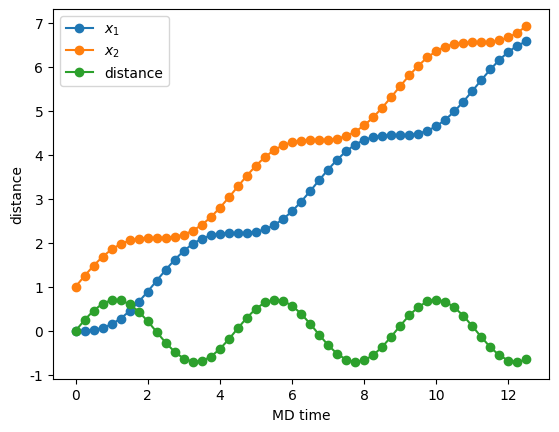

In [11]:
import matplotlib.pyplot as plt

plt.xlabel("MD time")
plt.ylabel("distance")
plt.plot(thermo[:, 1], thermo[:, 2], marker="o", label="$x_1$")
plt.plot(thermo[:, 1], thermo[:, 3], marker="o", label="$x_2$")
plt.plot(thermo[:, 1], thermo[:, 4], marker="o", label="distance")

plt.legend()

plt.show()

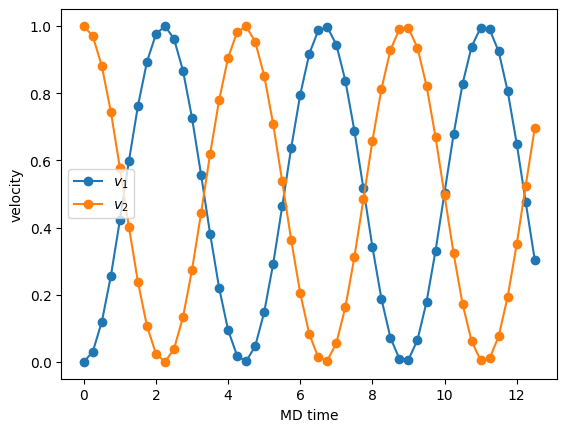

In [12]:
plt.xlabel("MD time")
plt.ylabel("velocity")
plt.plot(thermo[:, 1], thermo[:, 5], marker="o", label="$v_1$")
plt.plot(thermo[:, 1], thermo[:, 6], marker="o", label="$v_2$")

plt.legend()

plt.show()

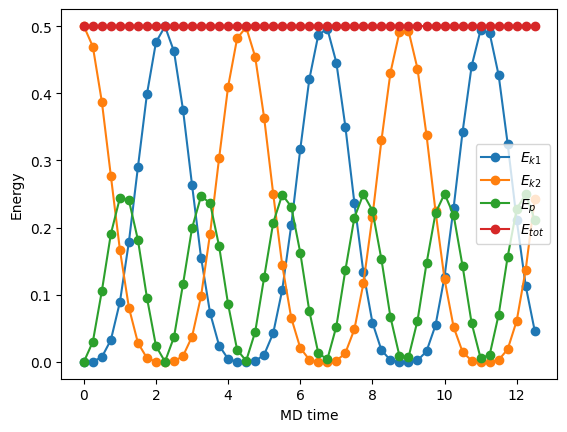

In [13]:
plt.xlabel("MD time")
plt.ylabel("Energy")
plt.plot(thermo[:, 1], thermo[:, 7], marker="o", label="$E_{k1}$")
plt.plot(thermo[:, 1], thermo[:, 8], marker="o", label="$E_{k2}$")
plt.plot(thermo[:, 1], thermo[:, 9], marker="o", label="$E_{p}$")
plt.plot(thermo[:, 1], thermo[:, -1], marker="o", label="$E_{tot}$")

plt.legend()

plt.show()